In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
import mlflow
import mlflow.sklearn

In [4]:
# Load the data
file_path = 'data/nigeria_cities_weather_data.csv'
weather_data = pd.read_csv(file_path)

# Preprocess the data
weather_data['date'] = pd.to_datetime(weather_data['date'])
weather_data['sunrise'] = pd.to_datetime(weather_data['sunrise'])
weather_data['sunset'] = pd.to_datetime(weather_data['sunset'])
weather_data['year'] = weather_data['date'].dt.year
weather_data['month'] = weather_data['date'].dt.month
weather_data['day'] = weather_data['date'].dt.day
weather_data['hour'] = weather_data['date'].dt.hour

columns_to_drop = ['country', 'city', 'latitude', 'longitude', 'sunrise', 'sunset', 'timezone', 'description', 'region', 'date']
weather_data_cleaned = weather_data.drop(columns=columns_to_drop)

# Define target variable and features
target = 'temp'
features = weather_data_cleaned.drop(columns=[target])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, weather_data_cleaned[target], test_size=0.2, random_state=42)

# Start an MLflow run
with mlflow.start_run():
    # Create and train the model
    model = LinearRegression()
    model.fit(X_train, y_train)

    # Predict on the test set
    predictions = model.predict(X_test)

    # Calculate evaluation metrics
    mae = mean_absolute_error(y_test, predictions)
    rmse = mean_squared_error(y_test, predictions, squared=False)

    # Log parameters, metrics, and model
    mlflow.log_param("model_type", "LinearRegression")
    mlflow.log_metric("mae", mae)
    mlflow.log_metric("rmse", rmse)
    mlflow.sklearn.log_model(model, "model")

    # Print the evaluation metrics
    print(f"Mean Absolute Error (MAE): {mae}")
    print(f"Root Mean Squared Error (RMSE): {rmse}")

/home/tonyai/Desktop/weather2/weather2/lib/python3.10/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Mean Absolute Error (MAE): 3.2687045943459182e-12
Root Mean Squared Error (RMSE): 3.7370436070959245e-12


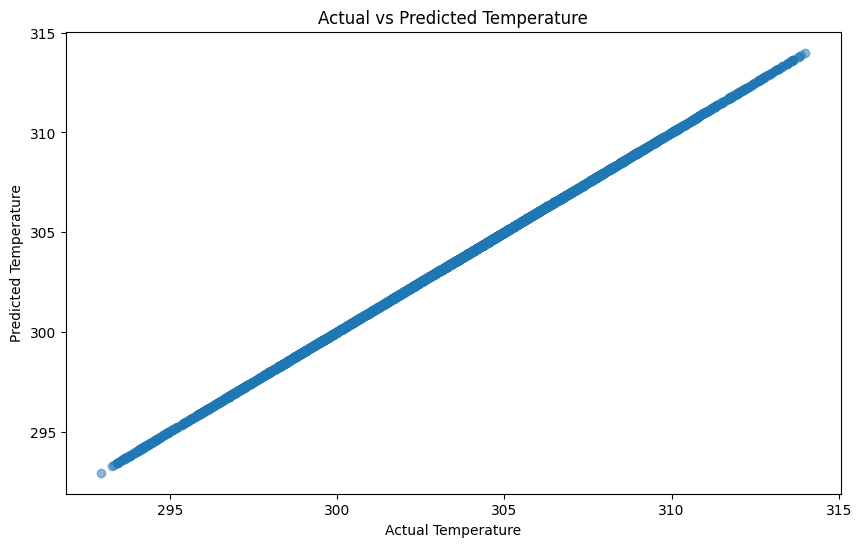

In [3]:
import matplotlib.pyplot as plt

# Plot actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, predictions, alpha=0.5)
plt.xlabel("Actual Temperature")
plt.ylabel("Predicted Temperature")
plt.title("Actual vs Predicted Temperature")
plt.show()